In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor



In [10]:
df = pd.read_csv("../datasets/carprices.csv")

In [11]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


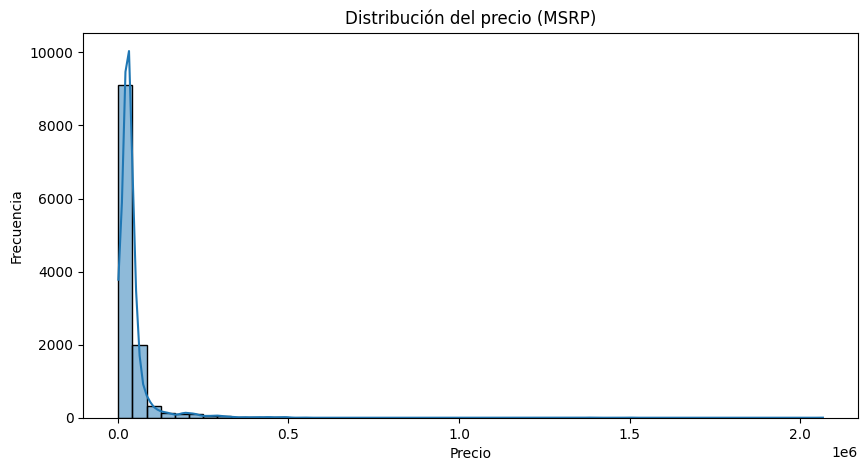

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='MSRP', kde=True, bins=50)
plt.title('Distribución del precio (MSRP)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

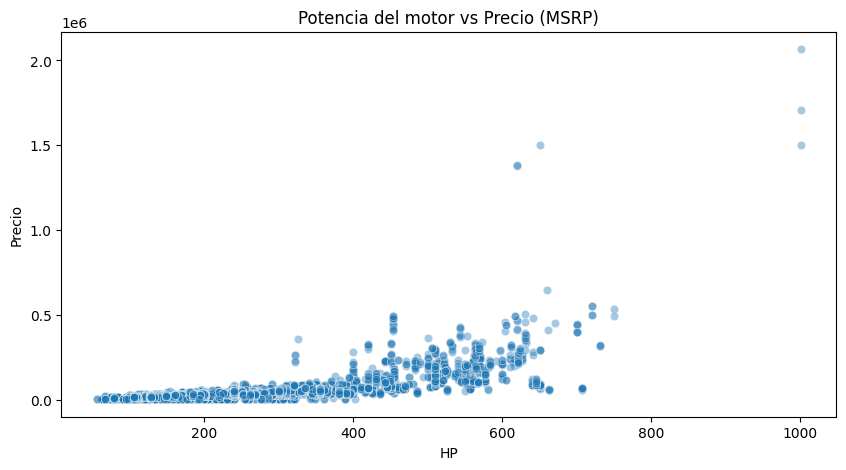

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Engine HP', y='MSRP', alpha=0.4)
plt.title('Potencia del motor vs Precio (MSRP)')
plt.xlabel('HP')
plt.ylabel('Precio')
plt.show()

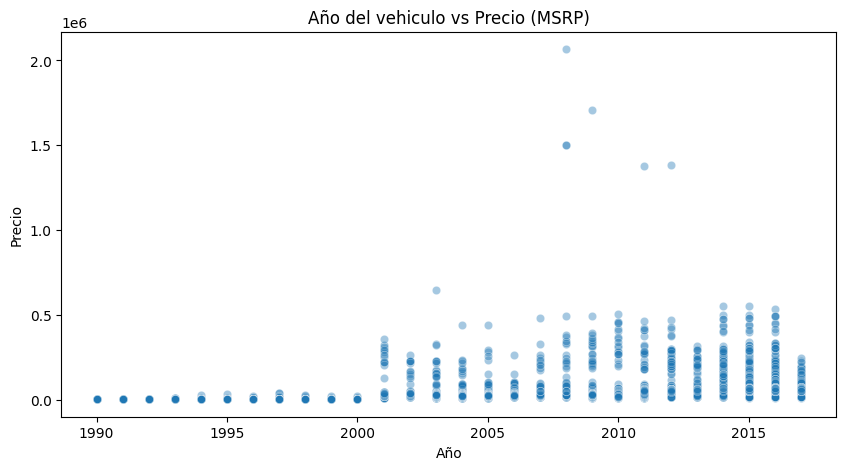

In [14]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Year', y='MSRP', alpha=0.4)
plt.title('Año del vehiculo vs Precio (MSRP)')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

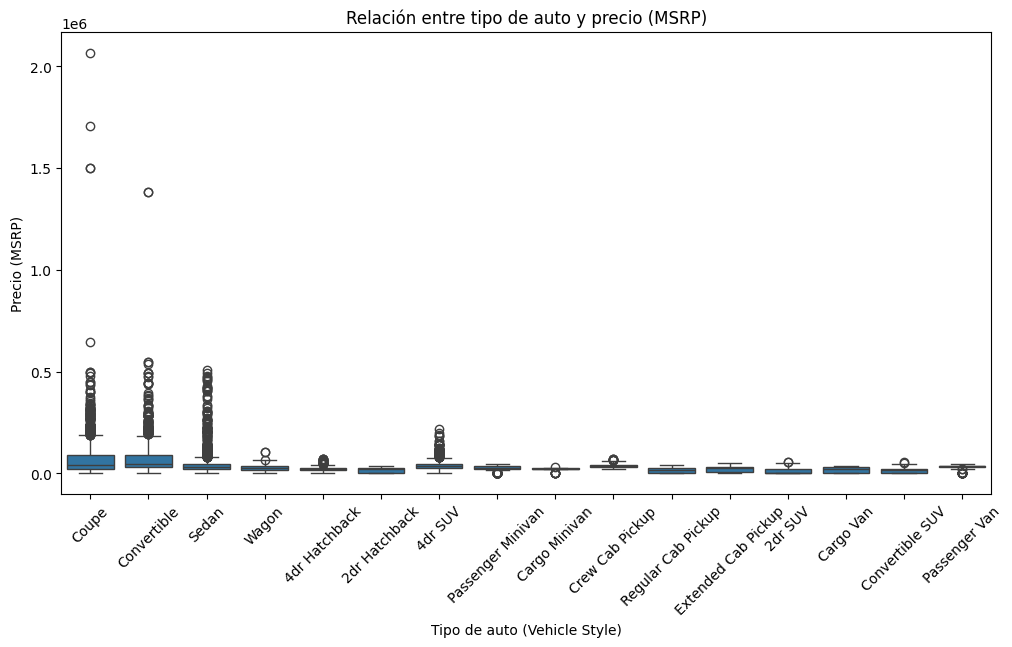

In [15]:


plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Vehicle Style', y='MSRP')
plt.xticks(rotation=45)
plt.title('Relación entre tipo de auto y precio (MSRP)')
plt.xlabel('Tipo de auto (Vehicle Style)')
plt.ylabel('Precio (MSRP)')
plt.show()


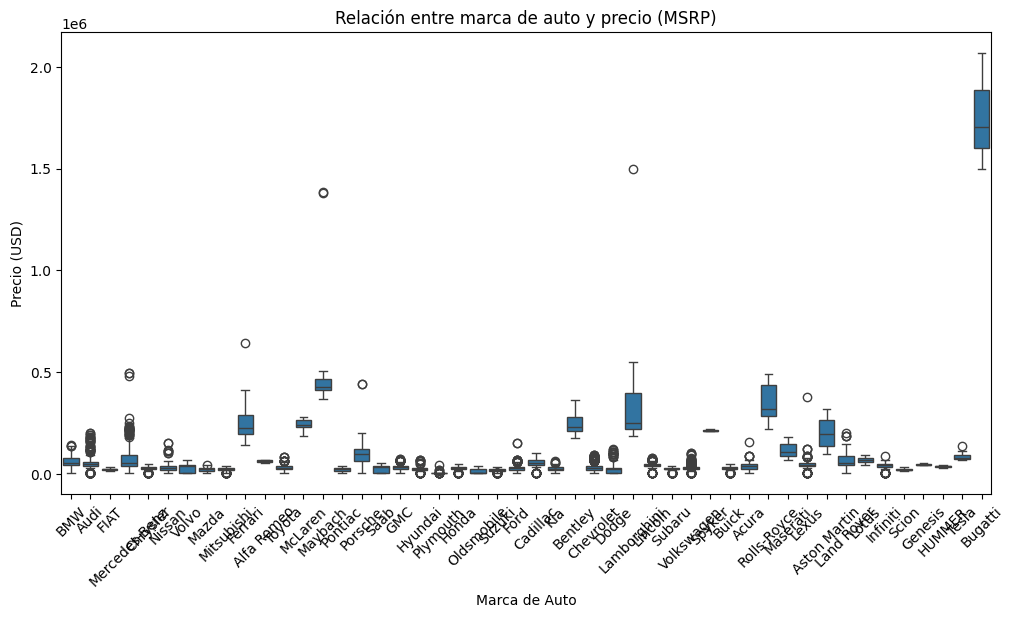

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Make', y='MSRP')
plt.xticks(rotation=45)
plt.title('Relación entre marca de auto y precio (MSRP)')
plt.xlabel('Marca de Auto')
plt.ylabel('Precio (USD)')
plt.show()


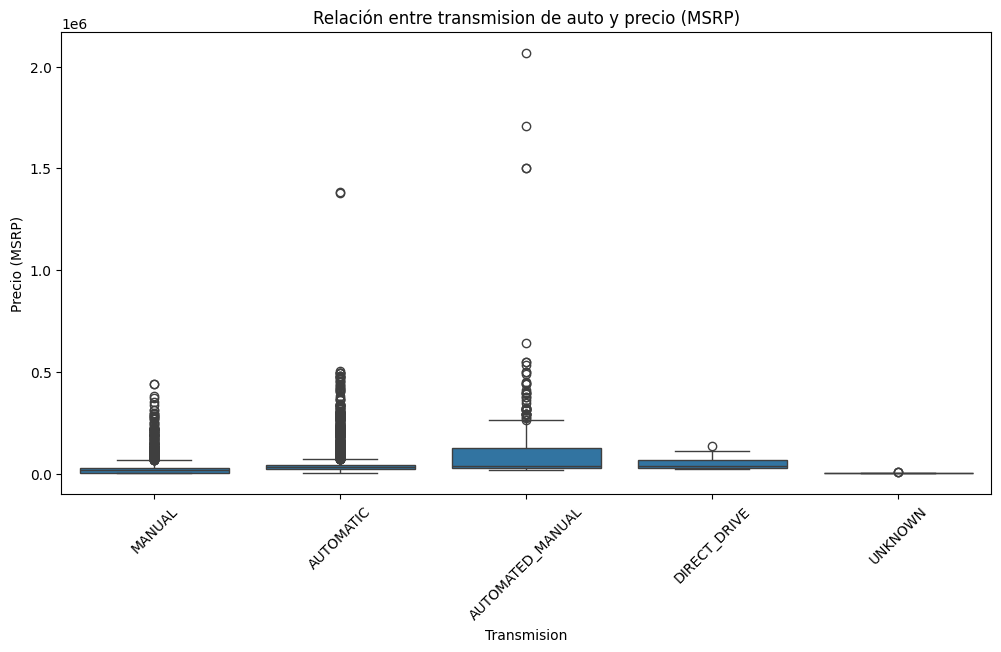

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Transmission Type', y='MSRP')
plt.xticks(rotation=45)
plt.title('Relación entre transmision de auto y precio (MSRP)')
plt.xlabel('Transmision')
plt.ylabel('Precio (MSRP)')
plt.show()

In [18]:
data = df[['Engine HP', 'Engine Cylinders']].dropna()

# Calculamos la correlación de Pearson
corr = data['Engine HP'].corr(data['Engine Cylinders'])

print(f"Correlación entre Engine HP y Engine Cylinders: {corr:.2f}")

Correlación entre Engine HP y Engine Cylinders: 0.78


In [19]:
df.groupby('Engine Fuel Type')['MSRP'].mean().sort_values(ascending=False)


Engine Fuel Type
flex-fuel (premium unleaded required/E85)       159429.351852
premium unleaded (required)                     101627.093579
flex-fuel (premium unleaded recommended/E85)     48641.923077
electric                                         47943.030303
premium unleaded (recommended)                   40812.831254
diesel                                           40788.000000
flex-fuel (unleaded/natural gas)                 39194.166667
flex-fuel (unleaded/E85)                         36258.260289
natural gas                                      28065.000000
regular unleaded                                 23013.955521
Name: MSRP, dtype: float64

In [20]:
df = pd.read_csv("carPrices.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'carPrices.csv'

In [ ]:
make_counts = df['Make'].value_counts()
total = len(df)
make_percent = (make_counts / total) * 100
print(make_percent.sort_values())


Make
Bugatti          0.025180
Genesis          0.025180
Spyker           0.025180
McLaren          0.041967
Alfa Romeo       0.041967
Maybach          0.134296
HUMMER           0.142689
Tesla            0.151083
Lotus            0.243411
Rolls-Royce      0.260198
Lamborghini      0.436461
Maserati         0.486822
Scion            0.503609
FIAT             0.520396
Ferrari          0.579151
Bentley          0.621118
Plymouth         0.688266
Aston Martin     0.780594
Saab             0.931677
Porsche          1.141514
Land Rover       1.200269
Oldsmobile       1.259023
Lincoln          1.376532
Pontiac          1.561189
Chrysler         1.569582
Buick            1.645123
Lexus            1.695484
Mitsubishi       1.787813
Kia              1.938895
Acura            2.115159
Subaru           2.148733
Volvo            2.358570
Hyundai          2.543226
Audi             2.753064
Infiniti         2.769851
BMW              2.803425
Suzuki           2.946114
Mercedes-Benz    2.962901
Cadilla

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))


Market Category      3742
Engine HP              69
Engine Cylinders       30
Number of Doors         6
Engine Fuel Type        3
Make                    0
Model                   0
Year                    0
Transmission Type       0
Driven_Wheels           0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [ ]:
df[['city mpg', 'highway MPG']].dropna().corr()

,city mpg,highway MPG
city mpg,1.000000,0.886829
highway MPG,0.886829,1.000000


In [ ]:
df = df.drop(columns=[
    "Model", "Market Category", "Engine Cylinders", "Vehicle Size", "city mpg",  
])

In [ ]:
# Para columnas numéricas: 'Engine HP', 'Engine Cylinders', 'Number of Doors'
# Usamos la mediana para reemplazar los NaN, porque es más robusta frente a valores extremos.

df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].median())
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].median())

# Para la columna categórica 'Engine Fuel Type':
# Reemplazamos los NaN con la categoría más frecuente (moda).

fuel_mode = df['Engine Fuel Type'].mode()[0]  # .mode() devuelve una lista; tomamos el primer valor
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(fuel_mode)


In [ ]:

# Función para agrupar los tipos de combustible
def fuel_group(fuel):

    fuel = fuel.lower()
    if 'regular' in fuel:
        return 'Regular'
    elif 'premium' in fuel:
        return 'Premium'
    else:
        return 'Special'

# Aplicar la función para crear la nueva columna
df['Fuel Group'] = df['Engine Fuel Type'].apply(fuel_group)

# Eliminar la columna original
df = df.drop(columns=['Engine Fuel Type'])



In [ ]:
df.head(5)

,Make,Year,Engine HP,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Style,highway MPG,Popularity,MSRP,Fuel Group
0,BMW,2011,335.0,MANUAL,rear wheel drive,2.0,Coupe,26,3916,46135,Premium
1,BMW,2011,300.0,MANUAL,rear wheel drive,2.0,Convertible,28,3916,40650,Premium
2,BMW,2011,300.0,MANUAL,rear wheel drive,2.0,Coupe,28,3916,36350,Premium
3,BMW,2011,230.0,MANUAL,rear wheel drive,2.0,Coupe,28,3916,29450,Premium
4,BMW,2011,230.0,MANUAL,rear wheel drive,2.0,Convertible,28,3916,34500,Premium


In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
# Por ejemplo, para la columna 'Make'
print(df.columns.tolist())


['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'Popularity', 'MSRP', 'Make_Alfa Romeo', 'Make_Aston Martin', 'Make_Audi', 'Make_BMW', 'Make_Bentley', 'Make_Bugatti', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ferrari', 'Make_Ford', 'Make_GMC', 'Make_Genesis', 'Make_HUMMER', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Kia', 'Make_Lamborghini', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_Lotus', 'Make_Maserati', 'Make_Maybach', 'Make_Mazda', 'Make_McLaren', 'Make_Mercedes-Benz', 'Make_Mitsubishi', 'Make_Nissan', 'Make_Oldsmobile', 'Make_Plymouth', 'Make_Pontiac', 'Make_Porsche', 'Make_Rolls-Royce', 'Make_Saab', 'Make_Scion', 'Make_Spyker', 'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Transmission Type_AUTOMATIC', 'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL', 'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive', 'Driven_Wheels_front 

In [ ]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, make_scorer


X = df.drop(columns=['MSRP'])
y = df['MSRP']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)

# Linear Regression
lr = LinearRegression()
r2_scores_lr = cross_val_score(lr, X, y, cv=kf, scoring='r2')
rmse_scores_lr = -cross_val_score(lr, X, y, cv=kf, scoring=rmse_scorer)

print("Linear Regression Cross-Validation")
print("R2 scores:", r2_scores_lr)
print("Mean R2:", r2_scores_lr.mean())
print("RMSE scores:", rmse_scores_lr)
print("Mean RMSE:", rmse_scores_lr.mean())


rf = RandomForestRegressor(random_state=42, n_estimators=100)

r2_scores_rf = cross_val_score(rf, X, y, cv=kf, scoring='r2')
rmse_scores_rf = -cross_val_score(rf, X, y, cv=kf, scoring=rmse_scorer)

print("Random Forest Regressor")
print("R2 scores:", r2_scores_rf)
print("Mean R2:", r2_scores_rf.mean())
print("RMSE scores:", rmse_scores_rf)
print("Mean RMSE:", rmse_scores_rf.mean())



Linear Regression Cross-Validation
R2 scores: [0.8406508  0.85557751 0.82192826 0.7603666  0.88921162]
Mean R2: 0.8335469573639486
RMSE scores: [19488.97064227 25069.64061659 19982.49126734 36925.09816879
 19393.05827846]
Mean RMSE: 24171.851794690574
Random Forest Regressor
R2 scores: [0.97952381 0.9767777  0.96108547 0.85588207 0.9568095 ]
Mean R2: 0.9460157120887219
RMSE scores: [ 6986.15935073 10052.71297849  9341.31460359 28635.64614442
 12108.58330081]
Mean RMSE: 13424.883275606635


In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

# Entrenamos múltiples modelos con CV, y pedimos que los devuelva
cv_results = cross_validate(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    X, y,
    cv=5,
    return_estimator=True,
    scoring='r2'
)

# Extraemos las importancias de cada uno
importancias = [est.feature_importances_ for est in cv_results['estimator']]
mean_importance = np.mean(importancias, axis=0)

# Lo ponemos en un DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_importance
}).sort_values(by='Importance', ascending=False)

# Mostrar los top 15
print(feature_importance_df.head(15))


                           Feature  Importance
1                        Engine HP    0.626457
3                      highway MPG    0.091346
10                    Make_Bugatti    0.084270
4                       Popularity    0.063314
0                             Year    0.038056
42                Make_Rolls-Royce    0.015819
32                    Make_Maybach    0.012810
64       Vehicle Style_Convertible    0.010355
9                     Make_Bentley    0.006653
72             Vehicle Style_Sedan    0.006131
17                    Make_Ferrari    0.005036
35              Make_Mercedes-Benz    0.004976
2                  Number of Doors    0.004670
58  Driven_Wheels_rear wheel drive    0.004664
26                Make_Lamborghini    0.003964


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

# 💡 1. Log-transformar la variable objetivo
y_log = np.log1p(df['MSRP'])  # log(1 + MSRP) para evitar log(0)

# 🧠 2. Escalar los datos
X = df.drop(columns=['MSRP'])  # dejás afuera MSRP original
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧮 3. Definir modelo
model_lr = LinearRegression()

# 📏 4. Métricas personalizadas
def rmse_log(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

rmse_scorer = make_scorer(rmse_log, greater_is_better=False)

# 🎯 5. Cross-validation (R² y RMSE logarítmico)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model_lr, X_scaled, y_log, cv=cv, scoring='r2')
rmse_scores = -cross_val_score(model_lr, X_scaled, y_log, cv=cv, scoring=rmse_scorer)

# 📊 6. Mostrar resultados
print("Linear Regression con MSRP logarítmico")
print("R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print("RMSE log scores:", rmse_scores)
print("Mean RMSE log:", rmse_scores.mean())

# (Opcional: transformar log RMSE a escala original)
print("Mean RMSE en escala original (aproximado):", np.expm1(rmse_scores.mean()))


Linear Regression con MSRP logarítmico
R² scores: [0.85631389 0.8439594  0.81564989 0.84465087 0.86140215]
Mean R²: 0.8443952387470693
RMSE log scores: [0.42625231 0.42782094 0.47257855 0.43088151 0.4191357 ]
Mean RMSE log: 0.435333799958348
Mean RMSE en escala original (aproximado): 0.5454788536373987


In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Escalar los datos (muy importante para Ridge)
X = df.drop(columns=['MSRP'])  # dejás afuera MSRP original

# Crear el modelo Ridge con un alpha regularizador (ajustable)
ridge = Ridge(alpha=1.0)

# Evaluación con R²
r2_scores = cross_val_score(ridge, X, y, cv=kf, scoring='r2')
print("R² por fold:", r2_scores)
print("R² promedio:", r2_scores.mean())

# Evaluación con RMSE log
rmse_log_scores = -cross_val_score(ridge, X_scaled, y_log, cv=kf, scoring='neg_root_mean_squared_error')
print("RMSE log por fold:", rmse_log_scores)
print("RMSE log promedio:", rmse_log_scores.mean())

# Si querés ver el error aproximado en la escala original:
rmse_original = np.expm1(rmse_log_scores).mean()
print("RMSE en escala original (aproximado):", rmse_original)


R² por fold: [0.8406437  0.83231595 0.8221178  0.70824942 0.90345708]
R² promedio: 0.8213567909917494
RMSE log por fold: [19489.40479088 27013.2336359  19971.8536005  40743.07895685
 18103.36890366]
RMSE log promedio: 25064.187977558042
RMSE en escala original (aproximado): inf


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7916\389213979.py:25: RuntimeWarning: overflow encountered in expm1
  rmse_original = np.expm1(rmse_log_scores).mean()


In [ ]:
import xgboost as xgb


# Crear el modelo
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100  # Cantidad de árboles, podés ajustarlo
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar con R²
r2_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')

# Evaluar con RMSE
neg_mse_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-neg_mse_scores)

# Resultados
print("XGBoost Regressor Cross-Validation")
print("R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

XGBoost Regressor Cross-Validation
R² scores: [0.94754219 0.98524356 0.95699954 0.88521957 0.9439593 ]
Mean R²: 0.9437928318977356
RMSE scores: [11181.98694329  8013.48563361  9819.48186006 25555.3523161
 13792.75113964]
Mean RMSE: 13672.611578539136


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


# Configurar validación cruzada con barajado
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear pipeline con escalador (KNN necesita datos normalizados)
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# Evaluar
r2_knn = cross_val_score(knn_model, X, y, cv=cv, scoring='r2')
rmse_knn = -cross_val_score(knn_model, X, y, cv=cv, scoring='neg_root_mean_squared_error')

# Mostrar resultados
print("KNN R2 scores:", r2_knn)
print("KNN Mean R2:", r2_knn.mean())
print("KNN RMSE scores:", rmse_knn)
print("KNN Mean RMSE:", rmse_knn.mean())



KNN R2 scores: [0.91897005 0.8338841  0.87945213 0.70725047 0.89853351]
KNN Mean R2: 0.8476180532582245
KNN RMSE scores: [13897.50167803 26886.62541146 16441.13859408 40812.77168927
 18559.25380475]
KNN Mean RMSE: 23319.458235519305


In [ ]:
# Extraer las columnas que representan marcas
make_cols = [col for col in df.columns if col.startswith('Make_')]

# Reconstruir la columna 'Make' desde las columnas dummy
def get_make(row):
    for col in make_cols:
        if row[col] == 1:
            return col.replace('Make_', '')
    return 'Unknown'

df['Make'] = df[make_cols].apply(get_make, axis=1)


In [ ]:
# Definir los grupos
luxury_brands = ['Bugatti', 'Maybach', 'Rolls-Royce', 'Lamborghini', 'Bentley', 'McLaren', 'Ferrari']
high_end_brands = ['Aston Martin', 'Maserati', 'Porsche', 'Tesla', 'Mercedes-Benz', 'Land Rover', 'BMW', 'Cadillac', 'Audi', 'Lexus']
standard_brands = ['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge', 'Nissan', 'GMC', 'Honda', 'Mazda', 'Hyundai', 'Subaru', 'Kia', 'Mitsubishi']

# Asignar el grupo correspondiente
def map_make_group(make):
    if make in luxury_brands:
        return 'Luxury'
    elif make in high_end_brands:
        return 'High-End'
    elif make in standard_brands:
        return 'Standard'
    else:
        return 'Other'

df['Make Group'] = df['Make'].apply(map_make_group)

# Eliminar las columnas dummy originales de Make
df = df.drop(columns=make_cols + ['Make'])  # también borramos la columna temporal 'Make'

# Codificar la nueva columna agrupada
df = pd.get_dummies(df, columns=['Make Group'])




KeyError: 'Make'

In [ ]:
print(df.columns.tolist())


['Year', 'Engine HP', 'Number of Doors', 'highway MPG', 'Popularity', 'MSRP', 'Transmission Type_AUTOMATIC', 'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL', 'Transmission Type_UNKNOWN', 'Driven_Wheels_four wheel drive', 'Driven_Wheels_front wheel drive', 'Driven_Wheels_rear wheel drive', 'Vehicle Style_2dr SUV', 'Vehicle Style_4dr Hatchback', 'Vehicle Style_4dr SUV', 'Vehicle Style_Cargo Minivan', 'Vehicle Style_Cargo Van', 'Vehicle Style_Convertible', 'Vehicle Style_Convertible SUV', 'Vehicle Style_Coupe', 'Vehicle Style_Crew Cab Pickup', 'Vehicle Style_Extended Cab Pickup', 'Vehicle Style_Passenger Minivan', 'Vehicle Style_Passenger Van', 'Vehicle Style_Regular Cab Pickup', 'Vehicle Style_Sedan', 'Vehicle Style_Wagon', 'Fuel Group_Regular', 'Fuel Group_Special', 'Make Group_High-End', 'Make Group_Luxury', 'Make Group_Other', 'Make Group_Standard']


In [ ]:
columnas_importantes = [
    'Engine HP',
    'Year',
    'highway MPG',
    'Popularity',
    'Make Group_High-End',
    'Make Group_Luxury',
    'Make Group_Other',
    'Make Group_Standard',
    'MSRP'
]

df = df[columnas_importantes]


In [ ]:


# Variables predictoras y target
X = df.drop(columns='MSRP')
y = df['MSRP']

# Definir KFold con shuffle
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear modelo con poda (máxima profundidad)
rf = RandomForestRegressor(max_depth=10, random_state=42)

# Evaluar con R2
r2_scores = cross_val_score(rf, X, y, cv=cv, scoring='r2')

# Evaluar con RMSE
rmse_scores = -cross_val_score(rf, X, y, cv=cv, scoring='neg_root_mean_squared_error')

# Mostrar resultados
print("Random Forest Regressor con max_depth=10 y shuffle en CV")
print("R2 scores:", r2_scores)
print("Mean R2:", r2_scores.mean())
print("RMSE scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\utils\validation.py", line 2971, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1368, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\utils\validation.py", line 1053, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\sklearn\utils\_array_api.py", line 757, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Usuario\PycharmProjects\pythonProjectJuan\.venv\Lib\site-packages\pandas\core\generic.py", line 2168, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'BMW'


In [ ]:

from sklearn.preprocessing import StandardScaler


# 💡 1. Log-transformar la variable objetivo
y_log = np.log1p(df['MSRP'])  # log(1 + MSRP) para evitar log(0)

# 🧠 2. Escalar los datos
X = df.drop(columns=['MSRP'])  # dejás afuera MSRP original
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🧮 3. Definir modelo
model_lr = LinearRegression()

# 📏 4. Métricas personalizadas
def rmse_log(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

rmse_scorer = make_scorer(rmse_log, greater_is_better=False)

# 🎯 5. Cross-validation (R² y RMSE logarítmico)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = cross_val_score(model_lr, X_scaled, y_log, cv=cv, scoring='r2')
rmse_scores = -cross_val_score(model_lr, X_scaled, y_log, cv=cv, scoring=rmse_scorer)

# 📊 6. Mostrar resultados
print("Linear Regression con MSRP logarítmico")
print("R² scores:", r2_scores)
print("Mean R²:", r2_scores.mean())
print("RMSE log scores:", rmse_scores)
print("Mean RMSE log:", rmse_scores.mean())

# (Opcional: transformar log RMSE a escala original)
print("Mean RMSE en escala original (aproximado):", np.expm1(rmse_scores.mean()))


Linear Regression con MSRP logarítmico
R² scores: [0.82460637 0.8051783  0.80708875 0.81296275 0.82593106]
Mean R²: 0.8151534475525336
RMSE log scores: [0.47094073 0.47803741 0.4834272  0.47278914 0.46971784]
Mean RMSE log: 0.4749824622626214
Mean RMSE en escala original (aproximado): 0.6079859968023751
